# MIE1628S 2025 A1: Clustering Techniques with Hadoop MapReduce
## Scatter plot for k-means algorithm with centroid visaulization



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [2]:
#Load data from file
data_points = []
with open("data_points.txt", "r") as file:
    for line in file:
        x, y = map(float, line.strip().split(","))
        data_points.append([x, y])

data_points = np.array(data_points)

In [3]:
#define the function to load the data points and perform k-nearest neighbour and plot
def plot_by_centroids(data_points, centroids, title):
    centroids = np.array(centroids)

    # Assign each point to the nearest centroid
    labels = pairwise_distances_argmin(data_points, centroids)

    # Plot
    plt.figure(figsize=(10, 8))
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'pink', 'brown', 'gray', 'olive']
    for i in range(len(centroids)):
        plt.scatter(data_points[labels == i][:, 0], data_points[labels == i][:, 1],
                    s=10, color=colors[i % len(colors)], label=f'Cluster {i+1}')

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', c='black', s=200, edgecolor='white', label='Centroids')

    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
#Plot centroid movement over iterations
def plot_centroid_trajectories(centroids_by_iteration, title="Centroid Movement Over Iterations"):


    iterations = len(centroids_by_iteration)
    k = len(centroids_by_iteration[0])
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'pink', 'brown', 'gray', 'olive']


    # Plot centroid tracks
    for i in range(k):
        x_vals = [centroids[i][0] for centroids in centroids_by_iteration]
        y_vals = [centroids[i][1] for centroids in centroids_by_iteration]

        plt.plot(x_vals, y_vals, marker='o', color=colors[i % len(colors)], label=f'Centroid {i+1}')
        plt.scatter(x_vals[0], y_vals[0], marker='x', s=100, color=colors[i % len(colors)], label=f'Start {i+1}')
        plt.scatter(x_vals[-1], y_vals[-1], marker='o', s=120, color=colors[i % len(colors)],
                    edgecolors='black', label=f'End {i+1}')

    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()


## K = 5

In [5]:
# Init Centroid
initial_centroids_k_5 = np.array([
    [50.197031637442876, 32.94048164287042],
    [43.407412339767056, 6.541037020010927],
    [1.7885358732482017, 19.666657053079573],
    [32.63585404880337, 4.03843047564191],
    [48.41919054694239, 31.23767287880673]
])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


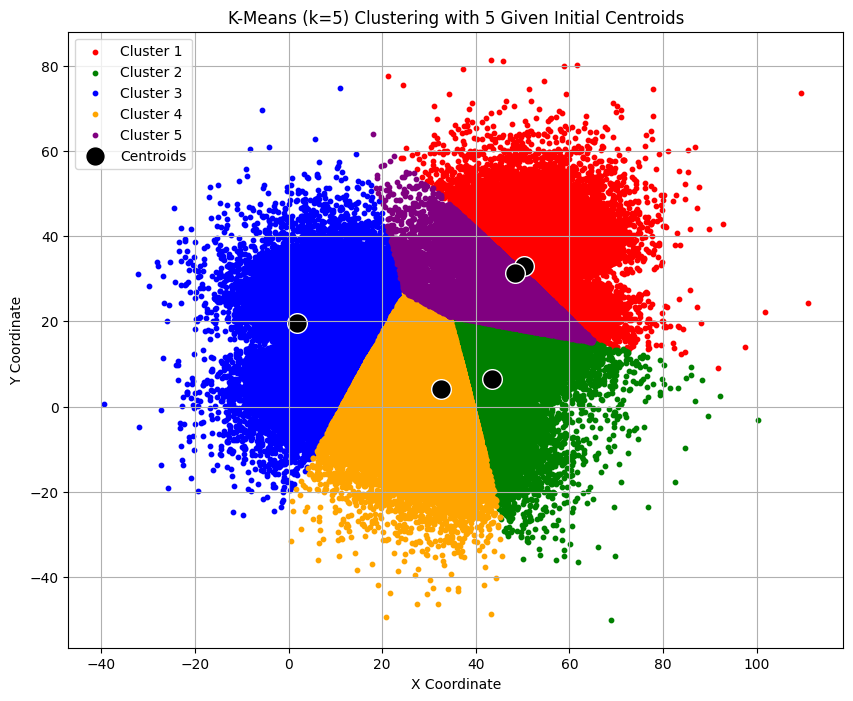

In [6]:
plot_by_centroids(data_points, initial_centroids_k_5,"K-Means (k=5) Clustering with 5 Given Initial Centroids")

In [7]:
# Final Centroid
final_centroids_k_5 = np.array([
    [34.88767058806049,-1.1492691361599863],
    [35.10524898166031, 6.810348684944596],
    [49.893531834503435, 35.93469249329149],
    [50.12782925362032, 27.58707497118695],
    [9.899168246470962, 15.16669211914742]
])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


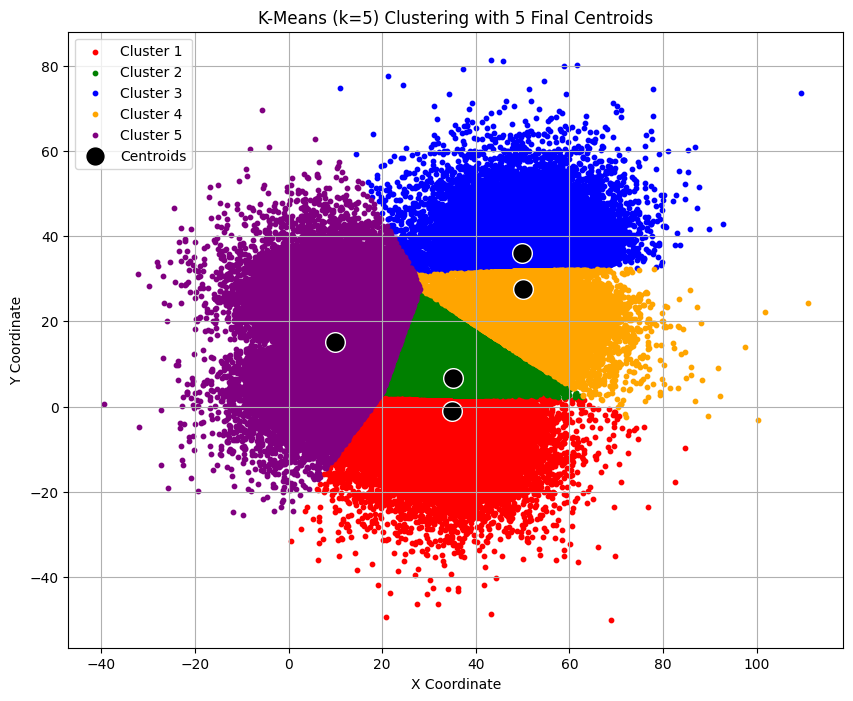

In [8]:
plot_by_centroids(data_points, final_centroids_k_5,"K-Means (k=5) Clustering with 5 Final Centroids")

In [9]:
centroid_list_k5 = [
    [[9.626097153475834, 15.363276505078863], [33.500373454589365, 1.7203033313413874], [43.079521818183075, 6.265931734643524], [49.006953001599456, 28.36715888493479], [51.96380985344402, 34.586843604317835]],
    [[34.177857432972594, 1.1326058420171121], [41.71088565111228, 7.546052238713526], [49.60892042093822, 27.916505244510333], [50.893556642216176, 35.78708079348193], [9.91964080588684, 15.13986838249391]],
    [[34.33946554741436, 0.7397608006373189], [39.89077031055448, 9.175414663229722], [49.9454764772578, 27.86421687151917], [50.271472549728806, 36.068789846468206], [9.945932654323508, 15.117199802528347]],
    [[34.50117518026651, 0.3983728723721397], [38.15148935022072, 9.860715152220076], [50.11448205352813, 27.880629104401084], [50.03158070144134, 36.15053105884137], [9.933760857224769, 15.107470215195333]],
    [[34.62991554381085, 0.1590313581553432], [36.96146002434376, 9.769729715617117], [49.925202520084355, 36.200842501308294], [50.18569719338278, 27.86378896795797], [9.9149778166073, 15.099340569097103]],
    [[34.717840782900126, -0.024807088340851036], [36.23604466183038, 9.404204293831768], [49.87945862779779, 36.21551503772857], [50.2037203757555, 27.8301468330694], [9.902025190316314, 15.09673205969752]],
    [[34.77872028294303, -0.1817994980013263], [35.8031135589289, 8.991603245920114], [49.86544115540251, 36.20523097331568], [50.1983074147623, 27.79515691222147], [9.895501742840958, 15.096969180764741]],
    [[34.81655787812316, -0.31897886507702533], [35.55511570772684, 8.617626081501209], [49.86349087394049, 36.18199886978291], [50.18806869289542, 27.763212412381293], [9.893034882542594, 15.097876256425295]],
    [[34.840231677132, -0.44081618849234644], [35.41040926704192, 8.29450909376036], [49.867003154667835, 36.151245484111534], [50.17619209331738, 27.735780757748177], [9.891955570006338, 15.09929410205596]],
    [[34.85644677161335, -0.5521931574683072], [35.312343488593626, 8.01733944276605], [49.871825615938256, 36.12086968997091], [50.16671893927996, 27.710077811089587], [9.892243958735802, 15.100767790805314]],
    [[34.86733316734398, -0.6537561747650589], [35.24838662567999, 7.780692231804086], [49.875738312606984, 36.09047869395971], [50.158999729478225, 27.6876797308535], [9.892950154827453, 15.10197616681177]],
    [[34.87454197690996, -0.7432220666701499], [35.206410754537316, 7.583604701568904], [49.87995275208765, 36.060466698111064], [50.1522963278097, 27.667666191508893], [9.89371874489017, 15.102777806308627]],
    [[34.87914369140341, -0.8260791466530774], [35.17484254457888, 7.411156060995702], [49.8823682649079, 36.033764151627416], [50.14689662301372, 27.6498650550137], [9.894084921805117, 15.103484883870307]],
    [[34.881910518863336, -0.900389791929061], [35.153601851433464, 7.261231243081093], [49.8847673780295, 36.00762518518747], [50.14239864104818, 27.632859238386406], [9.895582183872, 15.104366486735312]],
    [[34.88347735123231, -0.9680814126153188], [35.136987053378775, 7.132026933334772], [49.88691564611456, 35.98463323692881], [50.13846737119991, 27.61843692213444], [9.89625761114959, 15.105199448414604]],
    [[34.88514122873018, -1.032584300780561], [35.12575455650142, 7.013125924677395], [49.888876864659046, 35.96432144908959], [50.135084635895254, 27.606388769275856], [9.897706168633125, 15.105818087380326]],
    [[34.88604694952332, -1.0929509992113928], [35.116230478263894, 6.907532552773523], [49.89141664622288, 35.94866201752815], [50.13179525198624, 27.59695565351712], [9.89850720974356, 15.10647257739537]],
    [[34.88767058806049, -1.1492691361599863], [35.10524898166031, 6.810348684944596], [49.893531834503435, 35.93469249329149], [50.12782925362032, 27.58707497118695], [9.899168246470962, 15.10669211914742]]
]


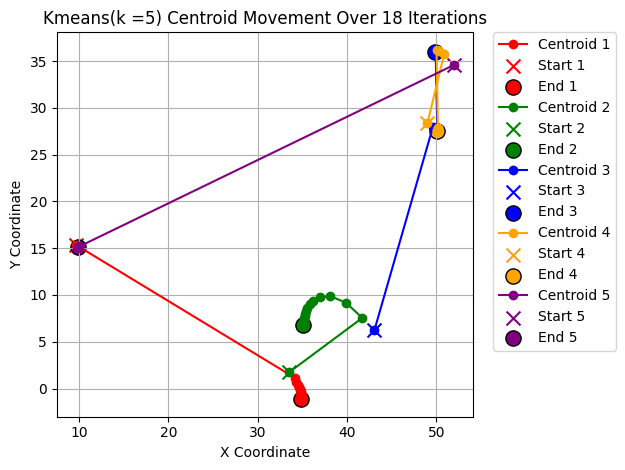

In [16]:
plot_centroid_trajectories(centroid_list_k5, "Kmeans(k =5) Centroid Movement Over 18 Iterations")

## K = 9

In [11]:
# Final Centroid
initial_centroids_k_9 = [
    [50.197031637442876, 32.94048164287042],
    [43.407412339767056, 6.541037020010927],
    [1.7885358732482017, 19.666657053079573],
    [32.63585404880337, 4.03843047564191],
    [48.41919054694239, 31.23767287880673],
    [35.1629665521855, 2.260927131398996],
    [49.04816562011978, 34.599014498332885],
    [53.12345979800841, 27.301827115259748],
    [2.6203753823788777, 11.657150534894178]
]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


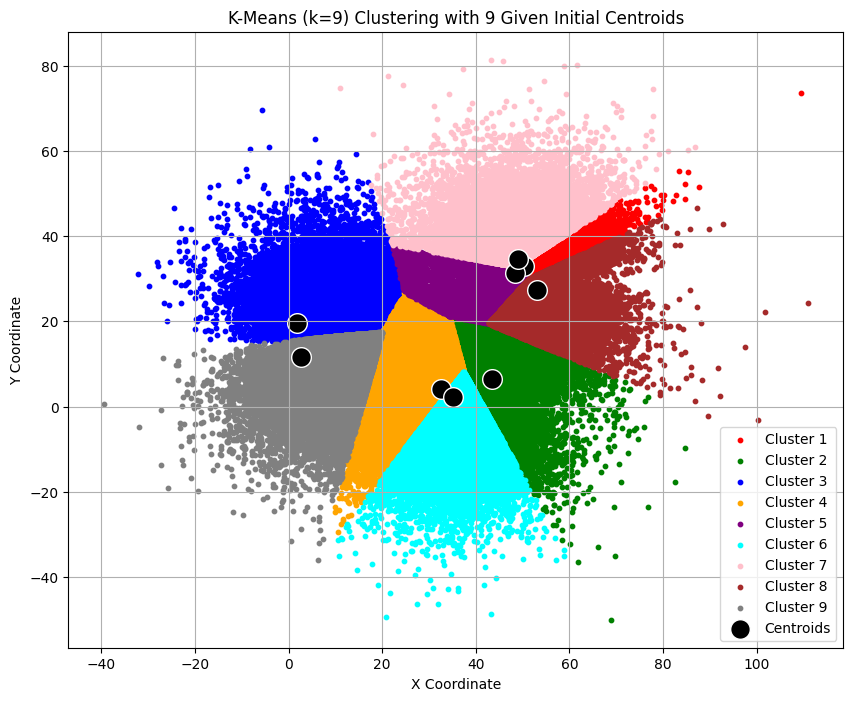

In [12]:
plot_by_centroids(data_points, initial_centroids_k_9,"K-Means (k=9) Clustering with 9 Given Initial Centroids")

In [13]:
# Final Centroid
final_centroids_k_9 = [
    [34.85081483358471, -6.336170885009358],
    [34.94276216123986, 2.166430378914925],
    [35.05506233421857, 10.962186968926042],
    [44.21759682100193, 38.21807344276957],
    [49.704128474225236, 29.831959466835674],
    [51.83387643527099, 21.69539513831765],
    [54.504504845800874, 37.372954531930674],
    [9.892262535282744, 12.248039419094328],
    [9.9171676341445912, 20.34993871969172]
]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


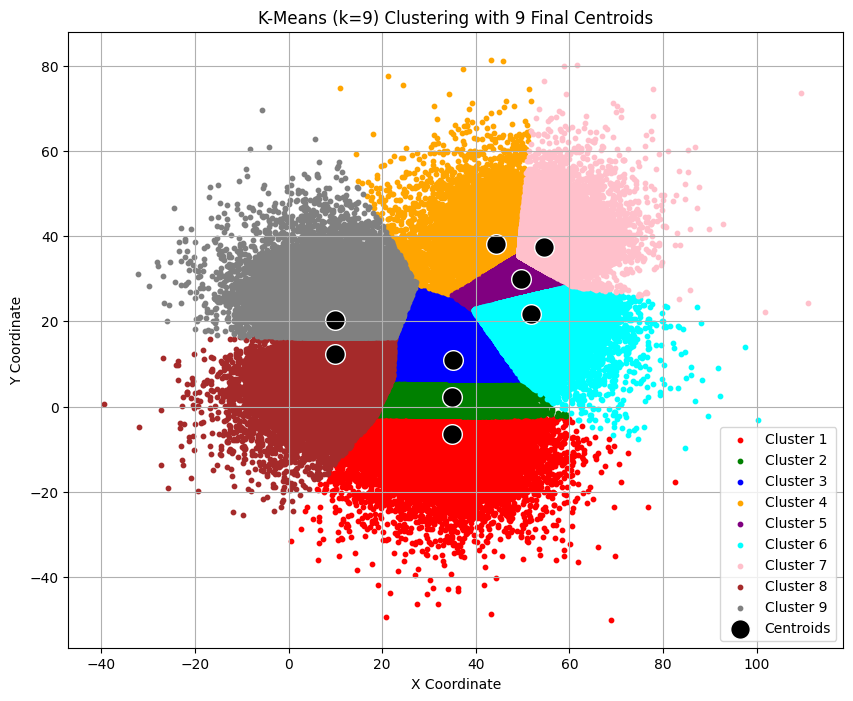

In [14]:
plot_by_centroids(data_points, final_centroids_k_9,"K-Means (k=9) Clustering with 9 Final Centroids")

In [17]:
centroid_list_k9 = np.array([[[50.197031637442876, 32.94048164287042],
        [43.407412339767056, 6.541037020010927],
        [1.7885358732482017, 19.666057053079573],
        [32.6358540480337, 4.03843047564191],
        [48.41919054694239, 31.23767287880673],
        [35.16296605521855, 2.260927131938996],
        [49.04816562011978, 34.599014498332885],
        [53.12345979800841, 27.301827115259748],
        [2.6203753823708777, 11.657150534894178]],
    [   [9.653634412707502, 20.52991271122476],
        [9.756222289538572, 12.467811475755632],
        [30.698585228179265, 5.986073624464031],
        [35.375270294679126, -0.10554091354496144],
        [42.83129976821911, 8.362966900643741],
        [48.35059013572223, 29.471367547973447],
        [48.332245555934115, 38.526170693915795],
        [52.199752823402704, 32.991509768187235],
        [52.15189721728226, 25.398623491609573]],
    [   [31.60875829725056, 6.8316899691117055],
        [35.171790804548976, -0.40419005198512276],
        [41.46759224171742, 9.388211542623038],
        [47.540562728438125, 39.61318191982403],
        [48.67715924425038, 29.422852056550344],
        [52.27645339719881, 24.19871908468561],
        [52.4867376311935, 33.36181394145546],
        [9.947760089884296, 20.602098338656386],
        [9.812916554749965, 12.405663146131058]],
    [   [32.19665916615808, 6.900817839774282],
        [35.092186351026605, -0.5703207907299749],
        [40.835295868645765, 9.691474384975026],
        [46.85221438059262, 40.04647302454175],
        [48.93344196181581, 29.464680398346914],
        [52.411559359421695, 23.42468726861598],
        [52.712189798454496, 33.85292157220267],
        [9.816542457088854, 12.382790830246032],
        [9.987169345671914, 20.59998095345236]],
    [   [32.553398873044145, 6.6619050205636015],
        [35.06960686110113, -0.6973210505024341],
        [40.55298193889467, 9.897746362908958],
        [46.216885130552804, 40.16139723461867],
        [49.09769839171122, 29.49415557531652],
        [52.475843933175476, 22.949114654154755],
        [52.951552499889154, 34.3512420145371],
        [9.826963631961368, 12.368417641720393],
        [9.997290597026607, 20.581629533211206]],
    [   [32.85706364922382, 6.320529748974197],
        [35.06458552163189, -0.8409994304162614],
        [40.36834923928115, 10.160238176161112],
        [45.6254421098398, 40.0536718205493],
        [49.21088922738017, 29.527895977203155],
        [52.510895405918774, 22.661413260175696],
        [53.189626839607676, 34.82950365189714],
        [9.835750261708792, 12.356512090350067],
        [10.004998191070321, 20.561551323259053]],
    [   [10.010349116248134, 20.54129076384937],
        [33.16866678979646, 5.922411327794246],
        [35.063814129062905, -1.0213681449570555],
        [40.18825814717642, 10.550682785528943],
        [45.155147252564745, 39.8478670401727],
        [49.29885939750408, 29.56715732747234],
        [52.52895074179439, 22.491491406753124],
        [53.39699814497122, 35.25672429787384],
        [9.843236522533289, 12.345364345106992]],
    [   [10.012321258080677, 20.518919564068376],
        [33.51264128356818, 5.479727279654267],
        [35.054676698818085, -1.2681594637696858],
        [39.970700968815216, 11.047225543655642],
        [44.80270677974475, 39.592056550220015],
        [49.36983168796133, 29.61151124482417],
        [52.54493786746981, 22.402678716140723],
        [53.583056878966296, 35.63314091000484],
        [9.851899964598266, 12.333541156065705]],
    [   [10.010690293966263, 20.49496075134338],
        [33.87755922666444, 4.980737088415169],
        [35.029076292529936, -1.6364222022654535],
        [39.68386784326702, 11.613915328293714],
        [44.545336186447514, 39.33824492036604],
        [49.42984884852969, 29.656692834896912],
        [52.56442530782267, 22.353403487837003],
        [53.74667939560891, 35.968055005448136],
        [9.861985175854532, 12.321513847313359]],
    [   [10.003173846176832, 20.4723846892814],
        [34.198484335936925, 4.384465586523744],
        [35.0157424656289, -2.267731369616405],
        [39.26071184236852, 12.166012892657683],
        [44.362133306567436, 39.108656962226725],
        [49.48210132201211, 29.6977626678528],
        [52.57336485549464, 22.31775288822252],
        [53.882092210067206, 36.26349697148205],
        [9.87179096516305, 12.309653683484127]],
    [   [9.987729980561088, 20.45123062917851],
        [34.383118046064176, 3.876392759399252],
        [35.04800946128303, -2.996254710449554],
        [38.69257939803601, 12.590727386249366],
        [44.25848564893508, 38.921165260872534],
        [49.52413404111035, 29.733322253669076],
        [52.58105558921073, 22.282904589310608],
        [53.99739912454021, 36.51500755818164],
        [9.883568057972099, 12.299657966463462]],
    [   [34.505368536907575, 3.483301183810507],
        [35.07427136745204, -3.6947760149094964],
        [38.07684241318185, 12.785545032695296],
        [44.20454249026578, 38.77356086602529],
        [49.55813566411576, 29.760970290037154],
        [52.56423473408368, 22.22467744041118],
        [54.096099866238575, 36.71340807286701],
        [9.893577106004722, 12.29001377875267],
        [9.965288166014126, 20.43122978034661]],
    [   [34.59161988354337, 3.186414162618123],
        [35.080418534509775, -4.29872592553599],
        [37.518214068594375, 12.764546729972862],
        [44.17898064814816, 38.657575903550374],
        [49.5860354438254, 29.78005086829062],
        [52.51068689556353, 22.15206033394592],
        [54.17511509112256, 36.87836909881678],
        [9.899406489416291, 12.281989095742547],
        [9.946426420197152, 20.41432054571066]],
    [   [34.6614428641847, 2.9577746295458245],
        [35.07253698934401, -4.781715391348555],
        [37.01108738207961, 12.614006940644149],
        [44.173429081925626, 38.56682743758353],
        [49.60817359260677, 29.794036217040045],
        [52.436547780863336, 22.079595119654396],
        [54.24409600767062, 37.00398288387557],
        [9.903350440609557, 12.27375300377607],
        [9.934146263455318, 20.399552108524105]],
    [   [34.71853840575144, 2.7745539052172683],
        [35.05193252651054, -5.169773727735915],
        [36.56288075156325, 12.381277859228282],
        [44.17510511695062, 38.49254791057919],
        [49.62559000677442, 29.803673621796495],
        [52.35017698424872, 22.005033938418855],
        [54.30321630668014, 37.09916502042925],
        [9.904248731831588, 12.266683967924681],
        [9.926405251223485, 20.38695305031549]],
    [   [34.76567704757057, 2.6260459830039644],
        [35.023503916780534, -5.475700609579434],
        [36.1880241049319, 12.117104488264369],
        [44.186671289130885, 38.43160641059576],
        [49.64088052807636, 29.810047615666424],
        [52.257622236854765, 21.935775168591306],
        [54.35532609711216, 37.172023101984145],
        [9.902983675138222, 12.261046552217953],
        [9.920221476677348, 20.3764786518096]],
    [   [34.809432536749476, 2.5008646151998697],
        [34.98556498170269, -5.721387535814393],
        [35.87260239687525, 11.84635868259471],
        [44.195609414763226, 38.372411963248574],
        [49.65638269935777, 29.816154862605313],
        [52.16396636061506, 21.874640132868382],
        [54.39694639786022, 37.23278963852691],
        [9.901537496720684, 12.256659946107767],
        [9.917360036749642, 20.367510727411105]],
    [   [34.84758783203813, 2.3943957733465955],
        [34.95056157902633, -5.923023827323012],
        [35.609313061022085, 11.58345112776599],
        [44.20383530830096, 38.32090221089417],
        [49.67071468045052, 29.821003630493433],
        [52.06983844816694, 21.820041137168545],
        [54.43189122824151, 37.283882840797666],
        [9.898842788522954, 12.253306728951177],
        [9.916415805366219, 20.36168745923646]],
    [   [34.88331688897052, 2.302798105858331],
        [34.91924888504106, -6.086880423238289],
        [35.38410834309288, 11.340334063806068],
        [44.20988544383486, 38.278177999745296],
        [49.68311335311762, 29.82591390857365],
        [51.983542964592324, 21.775104169278244],
        [54.4624926255337, 37.320770494347215],
        [9.896714686070103, 12.250354132468066],
        [9.916582725697992, 20.356424607481628]],
    [   [34.9144156125279, 2.2281351481683123],
        [34.88627117306026, -6.223799798833676],
        [35.198331487595695, 11.13223430694099],
        [44.21471650683918, 38.24555440664027],
        [49.693210915939005, 29.82921870606926],
        [51.9042918476091, 21.733270267312914],
        [54.48644757204466, 37.349002212417815],
        [9.89410691569239, 12.248985477241334],
        [9.917317599038586, 20.352304176779285]],
    [   [34.85081483358471, -6.336170885009358],
        [34.94276216123986, 2.166430378914925],
        [35.05506233421857, 10.962186968926042],
        [44.21759682100193, 38.21807344276957],
        [49.704128474225236, 29.831959466835674],
        [51.83387643527099, 21.69539513831765],
        [54.504504845800874, 37.372954531930674],
        [9.89226253528274, 12.248039419094328],
        [9.917167634145912, 20.34993871969172]]])

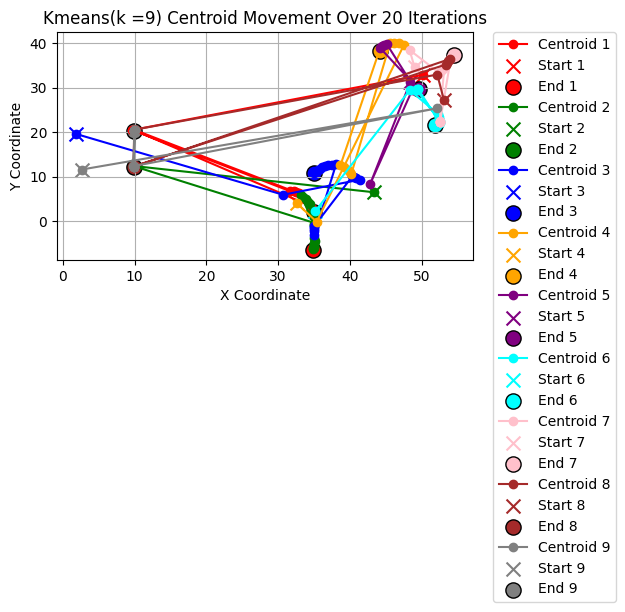

In [18]:
plot_centroid_trajectories(centroid_list_k9, "Kmeans(k =9) Centroid Movement Over 20 Iterations")